https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Original Data

In [2]:
df = pd.read_csv(r"C:\Users\Saniya\SANIYA\Projects\HeartDiseasePrediction\dataset\heart.csv")

print(f"df.shape: {df.shape}")

df.shape: (1025, 14)


Data Exploration & Preprocessing

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

723

In [10]:
df = df.drop_duplicates()

In [12]:
df.shape

(302, 14)

In [14]:
df.duplicated().sum()

0

In [15]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

In [16]:
OH_features = df.select_dtypes(['object', 'category']).columns.tolist()
print(OH_features)

[]


Data Splitting

In [17]:
X = df.drop(['target'], axis=1)
y = df['target']

In [20]:
print(f"X.shape: {X.shape}")
print(type(X))
print(f"y.shape: {y.shape}")
print(type(y))

X.shape: (302, 13)
<class 'pandas.core.frame.DataFrame'>
y.shape: (302,)
<class 'pandas.core.series.Series'>


In [21]:
print(f'X.columns: {X.columns}')
print(f'y.name: {y.name}')

X.columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
y.name: target


Train-test-split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (241, 13)
y_train.shape: (241,)
X_test.shape: (61, 13)
y_test.shape: (61,)


In [29]:
y_train.nunique()

2

Model Implementation & Evaluation

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
def implement(model, X_train, X_test, y_train, y_test):
    
    ### Implementation ###
    
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    
    ### Evaluation ###
    
    # Confusion Matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_train_df = pd.DataFrame(cr_train).T
    
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    cr_test_df = pd.DataFrame(cr_test).T
    
    
    # Plotting
    fig, ax = plt.subplots(2, 2, figsize=(12,9))
    
    # Train set
    sns.heatmap(cm_train, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], annot=True, square=True, ax=ax[0, 0])
    ax[0, 0].set_xlabel('Predicted')
    ax[0, 0].set_ylabel('Actual')
    ax[0, 0].set_title('Train Confusion Matrix')
    
    ax[0, 1].axis('off')
    table = ax[0, 1].table(cellText = cr_train_df.values, colLabels = cr_train_df.columns, rowLabels = cr_train_df.index, cellLoc='center', loc='center')
    ax[0, 1].set_title('Train Classification Report')
    
    # Test set
    sns.heatmap(cm_test, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], annot=True, square=True, ax=ax[1, 0])
    ax[1, 0].set_xlabel('Predicted')
    ax[1, 0].set_ylabel('Actual')
    ax[1, 0].set_title('Test Confusion Matrix')
    
    ax[1, 1].axis('off')
    table = ax[1, 1].table(cellText = cr_test_df.values, colLabels = cr_test_df.columns, rowLabels = cr_test_df.index, cellLoc='center', loc='center')
    ax[1, 1].set_title('Test Classification Report')
    
    plt.tight_layout()
    plt.show()
    
    
    ### Model score ###
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    
    f1_train = cr_train['weighted avg']['f1-score']
    f1_test = cr_test['weighted avg']['f1-score']
    
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    model_score = [precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, acc_train, acc_test]
    return model_score

In [32]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'F1 Train', 'F1 Test', 'Accuracy Train', 'Accuracy Test'])

1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr_model = LogisticRegression(max_iter=10000)

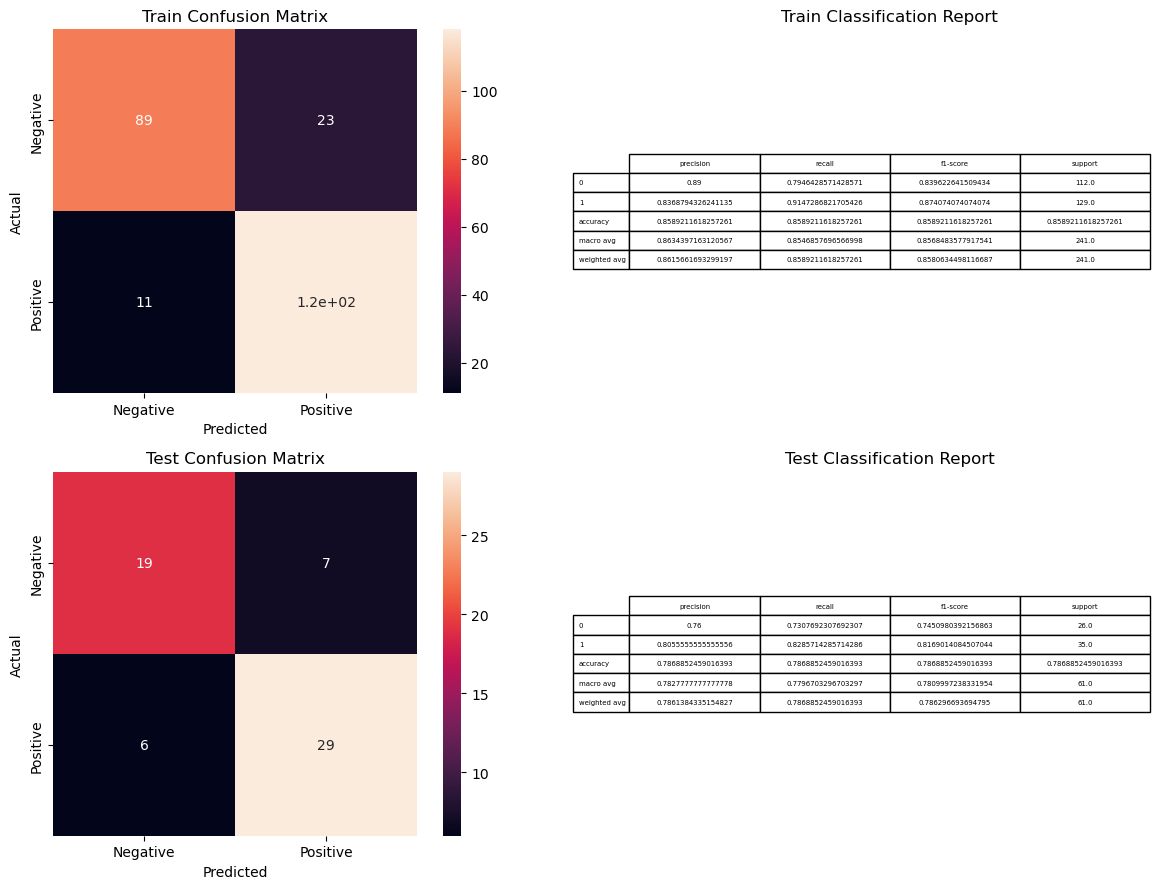

In [35]:
lr_score = implement(lr_model, X_train, X_test, y_train, y_test)

In [36]:
score['Logistic Regression'] = lr_score
score

,Logistic Regression
Precision Train,0.861566
Precision Test,0.786138
Recall Train,0.858921
Recall Test,0.786885
F1 Train,0.858063
F1 Test,0.786297
Accuracy Train,0.858921
Accuracy Test,0.786885


2. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt_model = DecisionTreeClassifier(random_state=1)

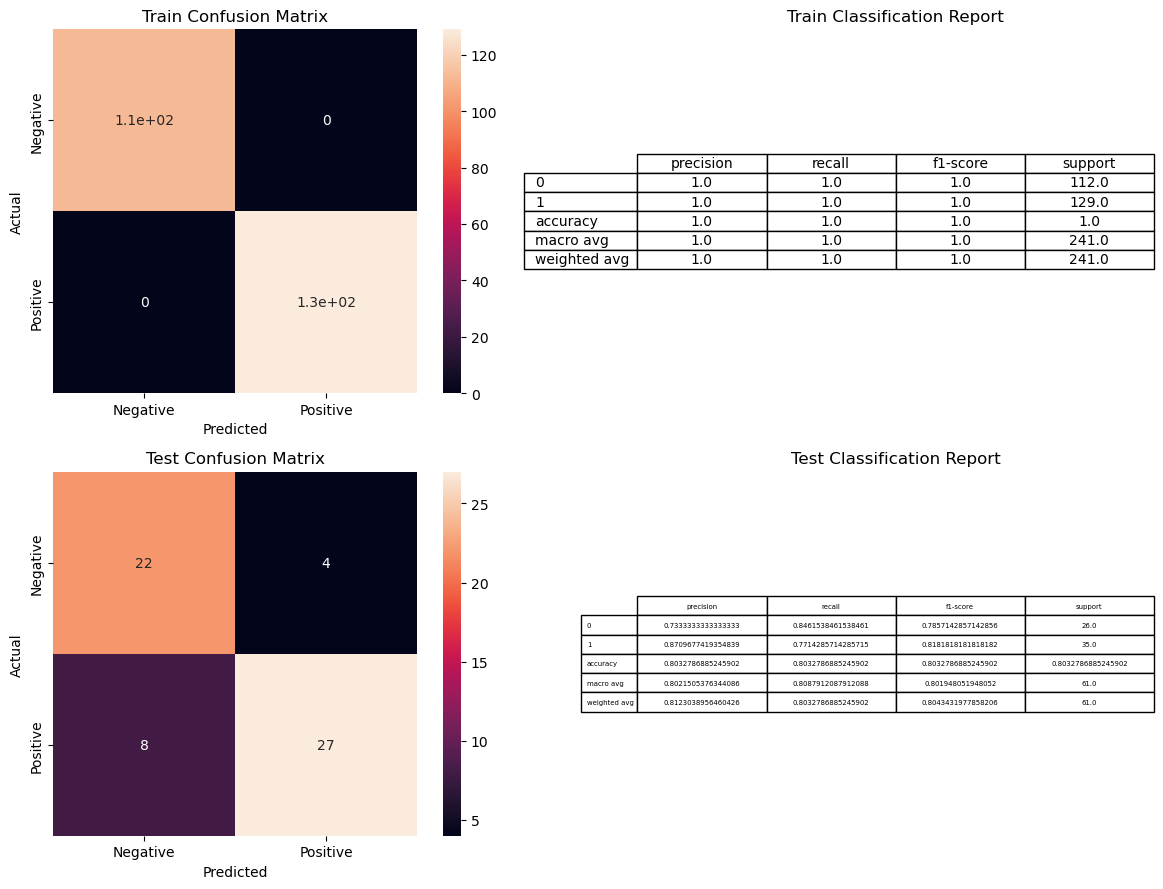

In [39]:
dt_score = implement(dt_model, X_train, X_test, y_train, y_test)

In [40]:
score['Decision Tree'] = dt_score
score

,Logistic Regression,Decision Tree
Precision Train,0.861566,1.000000
Precision Test,0.786138,0.812304
Recall Train,0.858921,1.000000
Recall Test,0.786885,0.803279
F1 Train,0.858063,1.000000
F1 Test,0.786297,0.804343
Accuracy Train,0.858921,1.000000
Accuracy Test,0.786885,0.803279


3. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier(random_state=1)

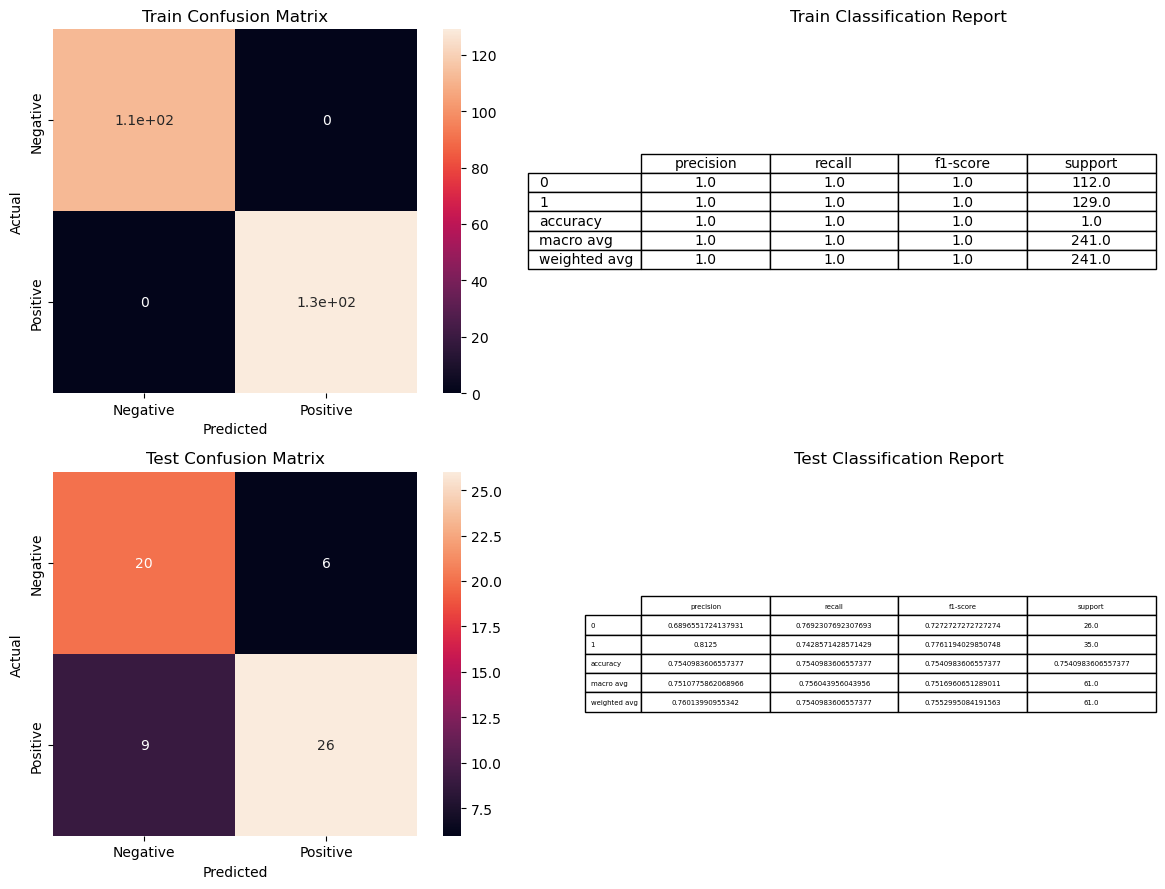

In [43]:
rf_score = implement(rf_model, X_train, X_test, y_train, y_test)

In [44]:
score['Random Forest'] = rf_score
score

,Logistic Regression,Decision Tree,Random Forest
Precision Train,0.861566,1.000000,1.000000
Precision Test,0.786138,0.812304,0.760140
Recall Train,0.858921,1.000000,1.000000
Recall Test,0.786885,0.803279,0.754098
F1 Train,0.858063,1.000000,1.000000
F1 Test,0.786297,0.804343,0.755300
Accuracy Train,0.858921,1.000000,1.000000
Accuracy Test,0.786885,0.803279,0.754098


4. SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)

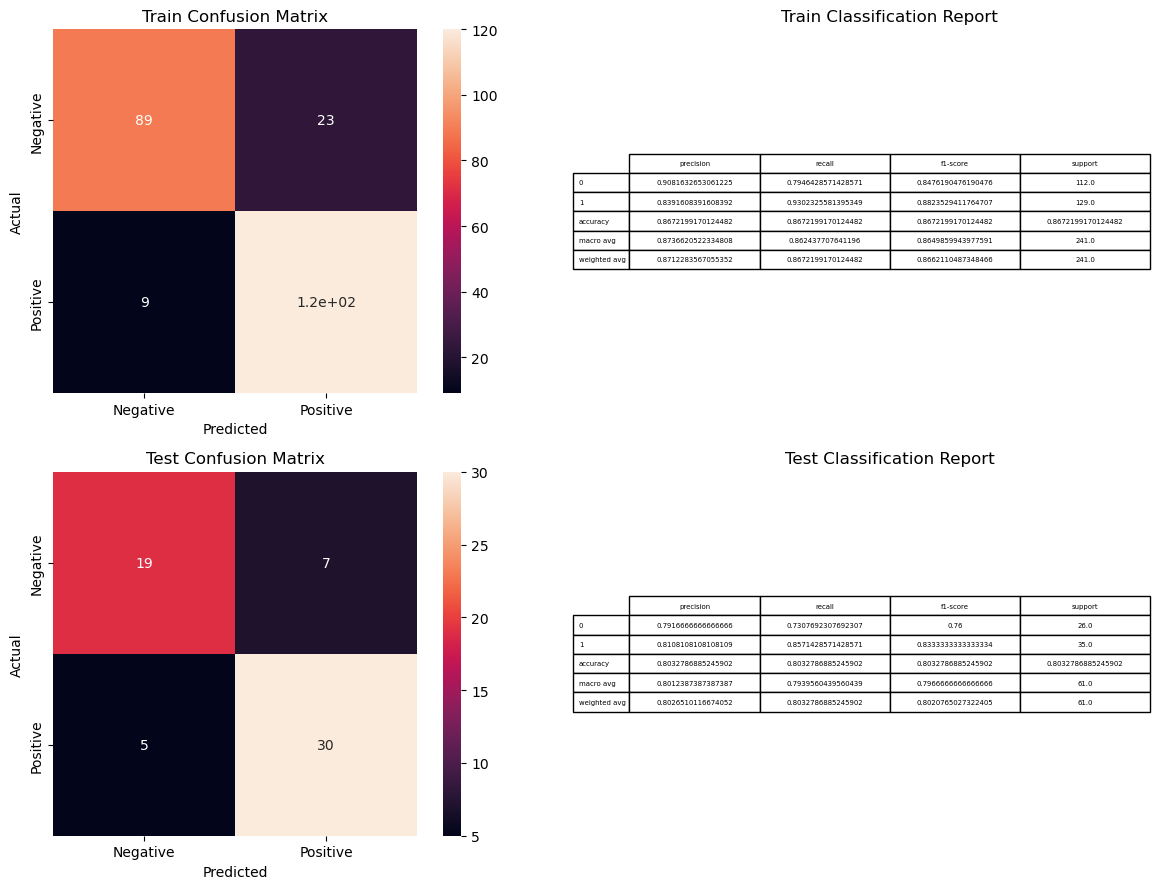

In [47]:
svm_score = implement(svm_model, X_train, X_test, y_train, y_test)

In [48]:
score['SVM'] = svm_score
score

,Logistic Regression,Decision Tree,Random Forest,SVM
Precision Train,0.861566,1.000000,1.000000,0.871228
Precision Test,0.786138,0.812304,0.760140,0.802651
Recall Train,0.858921,1.000000,1.000000,0.867220
Recall Test,0.786885,0.803279,0.754098,0.803279
F1 Train,0.858063,1.000000,1.000000,0.866211
F1 Test,0.786297,0.804343,0.755300,0.802077
Accuracy Train,0.858921,1.000000,1.000000,0.867220
Accuracy Test,0.786885,0.803279,0.754098,0.803279
